In [46]:
#Import all the necessary modules
import pandas as pd
import numpy as np
%matplotlib inline 


 Question 1 #Import and store the data in a data frame

Answer 1 

In [47]:
import urllib,json
dataset_url = urllib.request.urlopen('http://www.stat.ufl.edu/~winner/data/airq402.dat')
print('result code:'+ str(dataset_url.getcode()))
data=dataset_url.read()
print(data)


result code:200
b'CAK ATL    114.47   528    424.56  FL   70.19   111.03  FL   70.19   111.03\r\nCAK MCO    122.47   860    276.84  FL   75.10   123.09  DL   17.23   118.94\r\nALB ATL    214.42   852    215.76  DL   78.89   223.98  CO    2.77   167.12\r\nALB BWI     69.40   288    606.84  WN   96.97    68.86  WN   96.97    68.86\r\nALB ORD    158.13   723    313.04  UA   39.79   161.36  WN   15.34   145.42\r\nALB FLL    135.17  1204    199.02  WN   40.68   137.97  DL   17.09   127.69\r\nALB LAS    152.85  2237    237.17  WN   59.94   148.59  WN   59.94   148.59\r\nALB LAX    190.73  2467    191.95  DL   17.89   205.06  US   16.59   174.00\r\nALB MCO    129.35  1073    550.54  WN   76.84   127.69  WN   76.84   127.69\r\nALB TPA    134.17  1130    202.93  US   35.40   132.91  DL   26.40   124.78\r\nABQ ATL    212.49  1269    198.80  DL   68.39   226.79  AA   11.91   200.93\r\nABQ BWI    173.56  1670    312.39  WN   49.16   180.49  AA   14.37   161.39\r\nABQ ORD    170.67  1121    364.78 

In [48]:
url1='http://www.stat.ufl.edu/~winner/data/airq402.dat'


In [49]:
data_n=pd.read_csv(url1,delimiter='\s+' ,names=['City11-3','City25-7','Average Fare11-17','Distance20-23','Average weekly passengers26-33','market leading airline36-37','market share40-45','Average fare48-54','Low price airline57-58','market share61-66','price69-75'])

In [50]:
data_n.head()

,City11-3,City25-7,Average Fare11-17,Distance20-23,Average weekly passengers26-33,market leading airline36-37,market share40-45,Average fare48-54,Low price airline57-58,market share61-66,price69-75
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [51]:
data_n.shape

(1000, 11)

Question 2 #Remove the outliers from the data

Answer 2 

In [52]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City11-3                          1000 non-null object
City25-7                          1000 non-null object
Average Fare11-17                 1000 non-null float64
Distance20-23                     1000 non-null int64
Average weekly passengers26-33    1000 non-null float64
market leading airline36-37       1000 non-null object
market share40-45                 1000 non-null float64
Average fare48-54                 1000 non-null float64
Low price airline57-58            1000 non-null object
market share61-66                 1000 non-null float64
price69-75                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [53]:
import seaborn as sns
import matplotlib as mtb

In [54]:
data_n.describe()

,Average Fare11-17,Distance20-23,Average weekly passengers26-33,market share40-45,Average fare48-54,market share61-66,price69-75
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [55]:
from scipy import stats

In [56]:
#in z score individual column names have to be prvided as it is showing error with str 
z=np.abs(stats.zscore(data_n[["Average Fare11-17","Distance20-23" ,"Average weekly passengers26-33","market share40-45","Average fare48-54","market share61-66","price69-75"
]]))

In [57]:
print(z)

[[0.88376186 0.82281562 0.32333577 ... 0.88805083 1.31587826 0.68134108]
 [0.73919517 0.3063908  0.51614751 ... 0.69548767 0.63955964 0.51377609]
 [0.92241827 0.31883477 0.59587227 ... 0.91543248 1.17346508 0.50686631]
 ...
 [0.06153879 0.37794364 0.22387785 ... 0.1117307  0.7628822  0.33527637]
 [1.62285908 1.37346137 0.59758215 ... 1.48825391 2.40695059 1.47764552]
 [0.66329765 0.3079463  0.25665047 ... 0.58643242 0.1483755  0.45022426]]


In [58]:
threshold=3
print(np.where(z>3))

(array([ 63,  84, 197, 203, 212, 213, 213, 213, 215, 278, 281, 289, 295,
       297, 322, 388, 405, 527, 661, 669, 709, 714, 714, 716, 737, 737,
       737, 754, 760, 760, 774, 824, 836, 837, 837, 837, 837, 844, 846,
       847, 981, 981, 985, 985, 989], dtype=int64), array([2, 6, 6, 2, 6, 0, 4, 6, 6, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 0, 2,
       4, 2, 0, 4, 6, 2, 4, 6, 6, 2, 4, 0, 2, 4, 6, 2, 2, 2, 0, 4, 0, 4,
       4], dtype=int64))


In [59]:
# trying with interquartile method to detect and remove outliers 
Q1 = data_n.quantile(0.25)
Q3=data_n.quantile(0.75)
IQR=Q3 -Q1
print(IQR)
#no need to provide explictly int , float columns name 

Average Fare11-17                  71.4175
Distance20-23                     899.0000
Average weekly passengers26-33    512.7150
market share40-45                  27.0000
Average fare48-54                  78.8925
market share61-66                  39.7775
price69-75                         54.7625
dtype: float64


In [60]:
print(data_n < (Q1 - 1.5 * IQR)) |(data_n > (Q3 + 1.5 * IQR))

     Average Fare11-17  Average fare48-54  Average weekly passengers26-33  \
0                False              False                           False   
1                False              False                           False   
2                False              False                           False   
3                False              False                           False   
4                False              False                           False   
5                False              False                           False   
6                False              False                           False   
7                False              False                           False   
8                False              False                           False   
9                False              False                           False   
10               False              False                           False   
11               False              False                           False   

[1000 rows x 11 columns]


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [61]:
data_out=data_n[~((data_n < (Q1 - 1.5 * IQR)) |(data_n > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
data_out.head()

,City11-3,City25-7,Average Fare11-17,Distance20-23,Average weekly passengers26-33,market leading airline36-37,market share40-45,Average fare48-54,Low price airline57-58,market share61-66,price69-75
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [63]:
data_out.shape

(885, 11)

Question 3 #Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

Answer 3

In [64]:
dep_var=data_out["Average Fare11-17"]

In [65]:
indep_var=data_out.drop(["Average Fare11-17"],axis=1)
indep_var.head()

,City11-3,City25-7,Distance20-23,Average weekly passengers26-33,market leading airline36-37,market share40-45,Average fare48-54,Low price airline57-58,market share61-66,price69-75
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


Question 4 #Drop the independent variables which has less than 0.1 correlation with the dependent variable

Answer 4

In [66]:
data_out.corr()

,Average Fare11-17,Distance20-23,Average weekly passengers26-33,market share40-45,Average fare48-54,market share61-66,price69-75
Average Fare11-17,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance20-23,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers26-33,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share40-45,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare48-54,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share61-66,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price69-75,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [91]:
indep_var_corr=indep_var.drop(["Average weekly passengers26-33","market share40-45","market share61-66","City11-3","City25-7","market leading airline36-37","Low price airline57-58"],axis=1)
indep_var_corr.head()

,Distance20-23,Average fare48-54,price69-75
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


Question 5 #Create scatter Plot of Independent Variable vs Dependent Variable

Answer 5

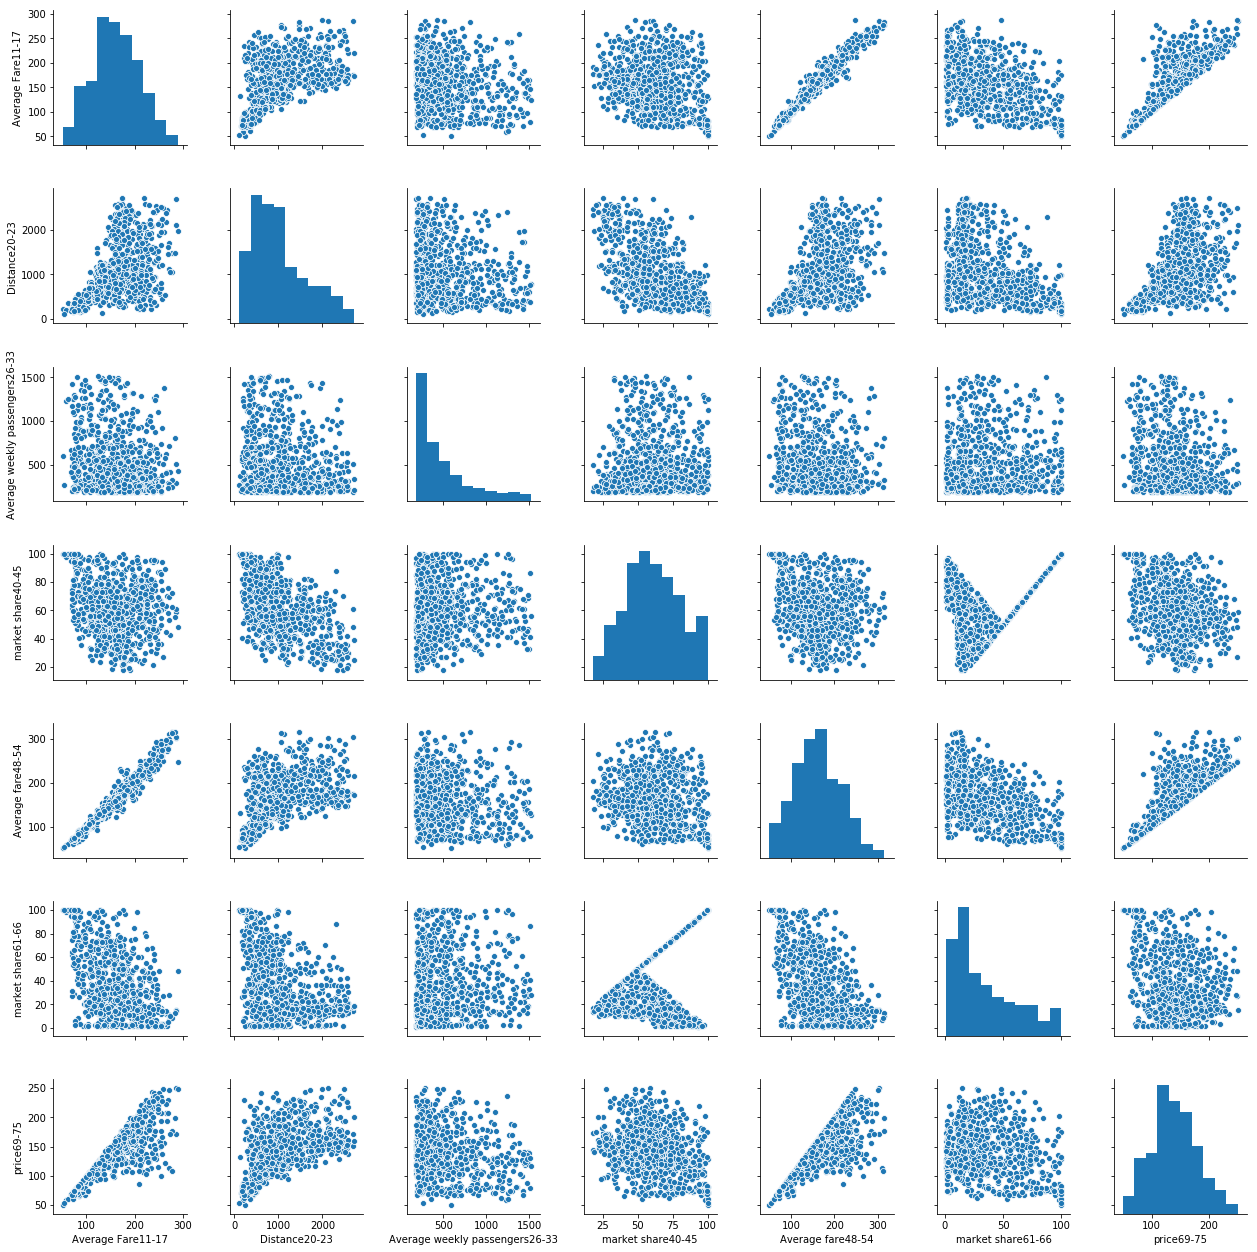

In [92]:
sns.pairplot(data_out)

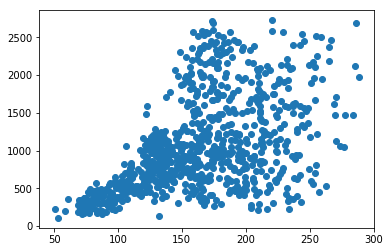

In [75]:
mtb.pyplot.scatter(dep_var,indep_var_corr["Distance20-23"])

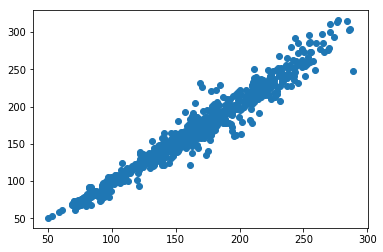

In [77]:
mtb.pyplot.scatter(dep_var,indep_var_corr["Average fare48-54"])

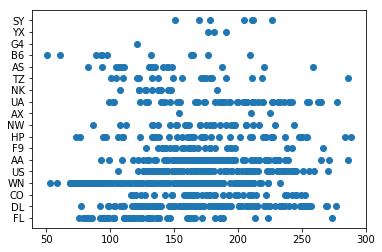

In [78]:
mtb.pyplot.scatter(dep_var,indep_var_corr["Low price airline57-58"])

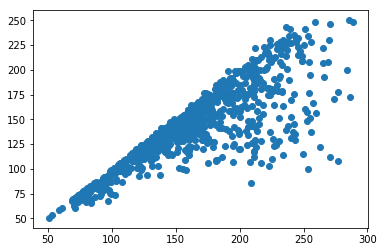

In [79]:
mtb.pyplot.scatter(dep_var,indep_var_corr["price69-75"])

Question 6 #Divide the data set into training and test data set and build a Multiple Linear Regression model.

Answer 6 

In [81]:
from sklearn.model_selection import train_test_split 

In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(indep_var_corr,dep_var,test_size=0.2,random_state=10)

In [94]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [95]:
lt=LinearRegression()
lt.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
y_pred=lt.predict(xtest)

Question 7 # Print the coefficients & intercepts of the linear regression model

Answer 7

In [100]:
#intercept
lt.intercept_

6.147696167862591

In [102]:
#cofficient
for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, lt.coef_[idx]))

The coefficient for Distance20-23 is 0.0021706608408716094
The coefficient for Average fare48-54 is 0.7373805414268738
The coefficient for price69-75 is 0.2260975468217306


Question 8 # Print the accuracy of the overall model

Answer 8 

In [108]:
# calucation R2 value 
from sklearn.metrics import r2_score 
r_sq=r2_score(ytest,y_pred)
r_sq

0.9674475462371657

In [110]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,y_pred)

In [111]:
import math

math.sqrt(mse)

8.750331497060595